<a href="https://colab.research.google.com/github/AnuragAgarwal00/machine_learning_wine-dataset/blob/main/lda_supervised_feature_extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 1. Standardize the d-dimensional dataset (d is the number of features).
# 2. For each class, compute the d-dimensional mean vector.
# 3. Construct the between-class scatter matrix, SB, and the within-class scatter matrix, SW.
# 4. Compute the eigenvectors and corresponding eigenvalues of the matrix, 𝑺𝑺𝑊𝑊
# −1𝑺𝑺𝐵𝐵.
# 5. Sort the eigenvalues by decreasing order to rank the corresponding eigenvectors
# Choose the k eigenvectors that correspond to the k largest eigenvalues to construct a d×k-dimensional transformation matrix, W; the eigenvectors are the columns of this matrix.
# 7. Project the examples onto the new feature subspace using the transformation matrix, W

In [ ]:
import numpy as np
import pandas as pd
df_wine = pd.read_csv(
  'https://archive.ics.uci.edu/ml/'
  'machine-learning-databases/wine/wine.data',
  header=None
 )

In [ ]:

from sklearn.model_selection import train_test_split
X,y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)

In [ ]:

from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_train_std =std.fit_transform(X_train)
X_test_std = std.transform(X_test)

In [ ]:
np.set_printoptions(precision=4)
mean_vecs = []
for label in range(1,4):
  mean_vecs.append(np.mean(X_train_std[y_train==label], axis=0))
  print(f'MV {label}: {mean_vecs[label - 1]}\n')

MV 1: [ 0.9066 -0.3497  0.3201 -0.7189  0.5056  0.8807  0.9589 -0.5516  0.5416
  0.2338  0.5897  0.6563  1.2075]

MV 2: [-0.8749 -0.2848 -0.3735  0.3157 -0.3848 -0.0433  0.0635 -0.0946  0.0703
 -0.8286  0.3144  0.3608 -0.7253]

MV 3: [ 0.1992  0.866   0.1682  0.4148 -0.0451 -1.0286 -1.2876  0.8287 -0.7795
  0.9649 -1.209  -1.3622 -0.4013]



In [ ]:
d = 13 # number of features
S_W = np.zeros((d, d))
for label, mv in zip(range(1, 4), mean_vecs):
  class_scatter = np.zeros((d, d))
  for row in X_train_std[y_train == label]:
    row, mv = row.reshape(d, 1), mv.reshape(d, 1)
    class_scatter += (row - mv).dot((row - mv).T)
    S_W += class_scatter
print('Within-class scatter matrix: 'f'{S_W.shape[0]}x{S_W.shape[1]}')
# Within-class scatter matrix: 13x13

Within-class scatter matrix: 13x13


In [ ]:
print('Class label distribution:',np.bincount(y_train)[1:])


Class label distribution: [41 50 33]


array([ 0, 41, 50, 33])

In [ ]:
d = 13 # number of features
S_W = np.zeros((d, d))
for label,mv in zip(range(1, 4), mean_vecs):
  class_scatter = np.cov(X_train_std[y_train==label].T)
  S_W += class_scatter
print('Scaled within-class scatter matrix:'
 f'{S_W.shape[0]}x{S_W.shape[1]}')

Scaled within-class scatter matrix:13x13


In [ ]:
mean_overall = np.mean(X_train_std, axis=0)
mean_overall = mean_overall.reshape(d, 1)
d = 13 # number of features
S_B = np.zeros((d, d))
for i, mean_vec in enumerate(mean_vecs):
  n = X_train_std[y_train == i + 1, :].shape[0]
  mean_vec = mean_vec.reshape(d, 1) # make column vector
  S_B += n * (mean_vec - mean_overall).dot(
  (mean_vec - mean_overall).T)
print('Between-class scatter matrix: '
  f'{S_B.shape[0]}x{S_B.shape[1]}')

Between-class scatter matrix: 13x13


In [ ]:
eigen_vals, eigen_vecs =\
  np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

In [ ]:
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i])
  for i in range(len(eigen_vals))]

In [ ]:
eigen_pairs = sorted(eigen_pairs,
  key=lambda k: k[0], reverse=True)
print('Eigenvalues in descending order:\n')
for eigen_val in eigen_pairs:
  print(eigen_val[0])

Eigenvalues in descending order:

349.61780890599397
172.7615221897938
3.277875948160424e-14
2.842170943040401e-14
2.6347620763320822e-14
2.6347620763320822e-14
1.7169492680170306e-14
1.7169492680170306e-14
1.674335053365992e-14
1.2740060380615543e-14
7.458378098449665e-15
4.737048557054326e-15
3.688843187314971e-15


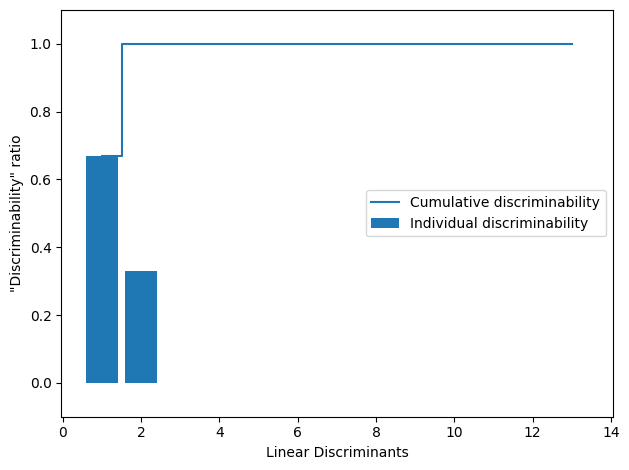

In [ ]:
import matplotlib.pyplot as plt

tot = sum(eigen_vals.real)
discr = [(i / tot) for i in sorted(eigen_vals.real,
  reverse=True)]
cum_discr = np.cumsum(discr)
plt.bar(range(1, 14), discr, align='center',
  label='Individual discriminability')
plt.step(range(1, 14), cum_discr, where='mid',
  label='Cumulative discriminability')
plt.ylabel('"Discriminability" ratio')
plt.xlabel('Linear Discriminants')
plt.ylim([-0.1, 1.1])
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [ ]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis].real,
  eigen_pairs[1][1][:, np.newaxis].real))
print('Matrix W:\n', w)

Matrix W:
 [[-0.1481 -0.4092]
 [ 0.0908 -0.1577]
 [-0.0168 -0.3537]
 [ 0.1484  0.3223]
 [-0.0163 -0.0817]
 [ 0.1913  0.0842]
 [-0.7338  0.2823]
 [-0.075  -0.0102]
 [ 0.0018  0.0907]
 [ 0.294  -0.2152]
 [-0.0328  0.2747]
 [-0.3547 -0.0124]
 [-0.3915 -0.5958]]


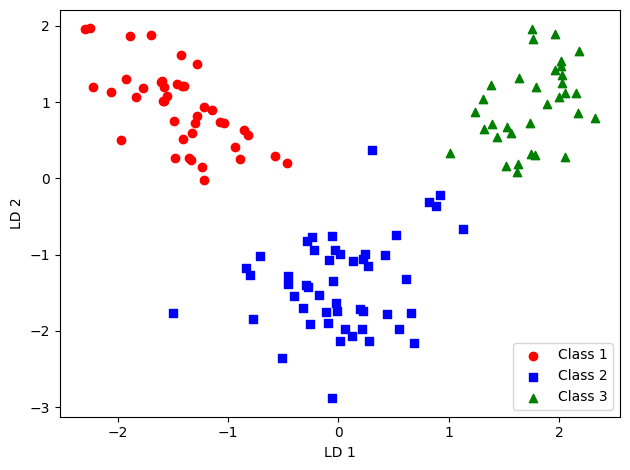

In [ ]:
X_train_lda = X_train_std.dot(w)
colors = ['r', 'b', 'g']
markers = ['o', 's', '^']
for l, c, m in zip(np.unique(y_train), colors, markers):
  plt.scatter(X_train_lda[y_train==l, 0],
  X_train_lda[y_train==l, 1] * (-1),
  c=c, label= f'Class {l}', marker=m)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train_std, y_train)

In [ ]:

from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
  # setup marker generator and color map
  import numpy as np
  markers = ('o', 's', '^', 'v', '<')
  colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
  cmap = ListedColormap(colors[:len(np.unique(y))])
  # plot the decision surface
  x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
  np.arange(x2_min, x2_max, resolution))
  lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  lab = lab.reshape(xx1.shape)
  plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())
  #  plot class examples
  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y == cl, 0],
    y=X[y == cl, 1],
    alpha=0.8,
    c=colors[idx],
    marker=markers[idx],
    label=f'Class {cl}',
    edgecolor='black')

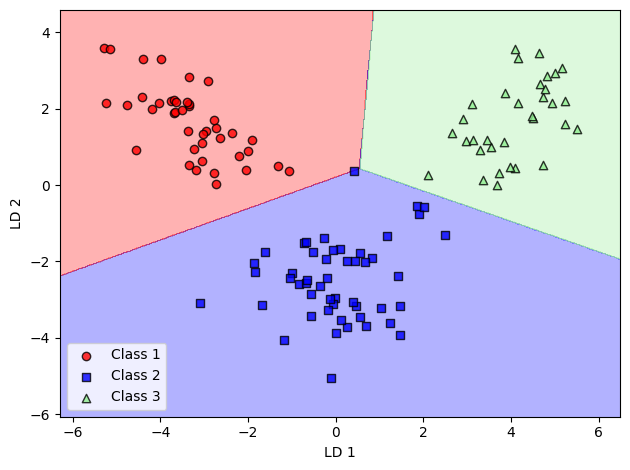

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(multi_class='ovr', random_state=1,
  solver='lbfgs')
lr = lr.fit(X_train_lda, y_train)
plot_decision_regions(X_train_lda, y_train, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()